In [3]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

In [4]:
O  = [2.5, 15.3, 21.7, 28.0]
Si = [7.6, 7.60, 7.60, 7.60]
dmu_cm = [-0.8, -0.93, -1.04, -1.10] 

In [33]:
"""Constants"""
Nb  = 100
ts  = 0*10**8
te  = 4.5*10**9
dt  = 5*10**6
evtoj=1.602e-19
Na=6.022140857e23
GG=6.67408e-11

hl_Ur238 = 4.46e9
secingyr = 3.15569e16
secinyr  = math.pi*1e7

In [34]:
beta  = 1.0/3.0
k     = 8
delta = 100e3
nu    = 1e10
cp    = 1000
r_l   = 3480e3
ds    = 300.0
rhom    = 5500
gamma_a = 2.0e-7
gamma_c = 1
gamma_m = 1.0e-7
eta     = 0.7

def radius(r_l,r_t,N):
    r = np.linspace(r_l,r_t,num=N)
    return r

def adiabat(Ta_t, r):
    Ta    =  Ta_t * (1 - gamma_a*(r - r[n-1]))
    dTadr = -Ta_t * gamma_a
    return Ta, dTadr
    
def melting(Tl_t,c,r):
    Tl    = (Tl_t - gamma_c*c) * (1 - gamma_m * (r - r[n-1]) )
    dTldr =-(Tl_t - gamma_c*c) * gamma_m 
    return Tl, dTldr
    
def mass(r_l,r_t):
    Mbmo = 4.0 * math.pi * rhom * (r_t**3 - r_l**3 ) / 3
    return Mbmo
    
def latent_coeff(Tl):
    L = Tl*ds
    return L
        
def latent(r_t,L,fac):
    """This is Gubbins et al 03 eqn 33 with the factor calculated from dadt_fac below"""
    Ql = -4 *math.pi *r_t**2 * L * rhom * fac
    return Ql
    
def latent_labrosse(r_t,L,cl,cs):
    dT = 3500-5500
    num = 4 * math.pi * rhom * L * (r_t**3 - r_l**3)
    den = 3 * (cl-cs) * dT
    return num/den
    
def radioactivity(h0,t,Mbmo):
#    h = h0 * 2**(-t/hl_Ur238)
    Qr = 20e12 * np.exp(-t/3e9)
    return Qr
    
def Tm_init(r_t,Tl):
    Qbmo_init = 30e12
    fac = Qbmo_init*delta / (4*math.pi*k*r_t**2)
    return Tl - fac
    
def bmo_flux_labrosse(r_t,Tl,Tm,deltaT):
    """Set Tm to the value needed to get 30TW of flux at time 0 when the BMO was 1000 km thick"""
    Qbmo = 4 * math.pi * r_t**2 * k * (Tl-Tm) / delta
    return Qbmo
    
def cmb_flux(A, T_c, Tl_m):
    deltaT = T_c - Tl_m
    Qcmb   = A * deltaT**(1+beta) * nu**(-beta) 
    return Qcmb
    
def cmb_flux_labrosse():
    Mc = -cp_core*M_core
    return Mc
    
def dcdt_fac_labrosse(r_t, cl, cs):
    num = 3 * r_t**2 * (cl-cs)
    den = r_t**3 - r_l**3
    return -num/den
    
def dadt_fac_labrosse(r_t, cl, cs):
    dT = 3500-5500
    num = r_t**3 - r_l**3
    den = 3 * r_t**2 * (cl-cs) * dT
    return num/den

def dadt_fac(dTadr, dTmdr): 
    """This is equation 25 of Gubbins et al 03, but in terms of dTdr rather than dT/dp. 
    Also I took the factor Ti/Tc = 1 as we are evaluating at the top, i.e. at Tc. """
    fac = -1 / (dTadr -dTldr)
    return fac

C:\Users\earcd\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


[ -1.94568257e-11  -2.00914468e-11  -2.07375645e-11  -2.14023663e-11
  -2.20864721e-11  -2.27903000e-11  -2.35142377e-11  -2.42586738e-11
  -2.50240080e-11  -2.58106553e-11  -2.66190479e-11  -2.74496371e-11
  -2.83028942e-11  -2.91793114e-11  -3.00794029e-11  -3.10037057e-11
  -3.19527807e-11  -3.29272131e-11  -3.39276141e-11  -3.49546212e-11
  -3.60088999e-11  -3.70911444e-11  -3.82020789e-11  -3.93424589e-11
  -4.05130726e-11  -4.17147421e-11  -4.29483249e-11  -4.42147158e-11
  -4.55148481e-11  -4.68496958e-11  -4.82202750e-11  -4.96276462e-11
  -5.10729165e-11  -5.25572413e-11  -5.40818274e-11  -5.56479348e-11
  -5.72568798e-11  -5.89100377e-11  -6.06088456e-11  -6.23548061e-11
  -6.41494902e-11  -6.59945409e-11  -6.78916777e-11  -6.98426999e-11
  -7.18494914e-11  -7.39140254e-11  -7.60383690e-11  -7.82246892e-11
  -8.04752578e-11  -8.27924581e-11  -8.51787910e-11  -8.76368823e-11
  -9.01694900e-11  -9.27795123e-11  -9.54699962e-11  -9.82441468e-11
  -1.01105337e-10  -1.04057120e-10

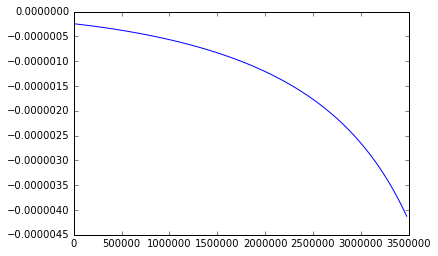

In [79]:
nt = int((te-ts)/dt)+1
Qbmo  = np.zeros(nt)
Qcmb  = np.zeros(nt)
Qrbmo = np.zeros(nt)
QLbmo = np.zeros(nt)
Qsbmo = np.zeros(nt)
tim   = np.zeros(nt)
r_top   = np.zeros(nt)
T_top  = np.zeros(nt)

"""Initial values"""
r_t  = 3880e3
Tl_t = 4700
cl   = 0.088
cs   = 0.0

"""Initial mass of the mantle"""
Mbmo = mass(r_l,r_t)
h0   = 20e12/Mbmo
Tm   = Tm_init(r_t,Tl_t)
deltaT_lm = Tl_t - Tm

for i in range (1,nt):
    
    tim[i] = ts + dt*i
    
    L    = latent_coeff(Tl_t)
    Mbmo = mass(r_l,r_t)

    Qbmo[i]   = bmo_flux_labrosse(r_t,Tl_t,Tm,deltaT_lm)
    Qrbmo[i]  = radioactivity(h0,tim[i],Mbmo)
    Qcmb_fac  = cmb_flux_labrosse()
    QL_fac    = latent_labrosse(r_t,L,cl,cs)

    dTldt = (Qbmo[i] - Qrbmo[i]) / (-Mbmo*cp + QL_fac + Qcmb_fac)
    
    Qsbmo[i] =-Mbmo*cp *dTldt
    Qcmb[i]  = Qcmb_fac*dTldt
    QLbmo[i] = QL_fac  *dTldt   
    drtdt = dadt_fac_labrosse(r_t,cl,cs)*dTldt
    r_t  = r_t  - drtdt*dt*secinyr
    Tl_t = Tl_t + dTldt*dt*secinyr
        
    r_top[i] = r_t
    T_top[i] = Tl_t

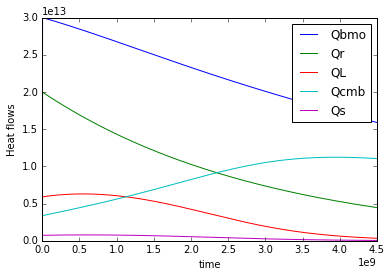

In [23]:
plt.plot(tim,Qbmo,label="Qbmo")
plt.plot(tim,Qrbmo,label="Qr")
plt.plot(tim,QLbmo,label="QL")
plt.plot(tim,Qcmb,label="Qcmb")
plt.plot(tim,Qsbmo,label="Qs")
plt.xlabel('time')
plt.ylabel('Heat flows')
plt.legend()
plt.show()

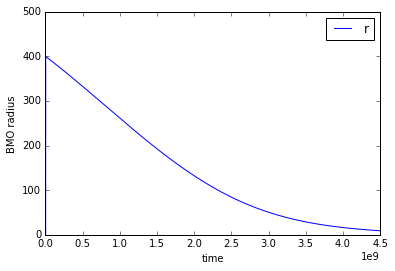

In [26]:
r_cmb = np.ones(nt)*r_l
plt.plot(tim,(r_top-r_cmb)/1e3,label="r")
plt.ylim((0,500))
plt.xlabel('time')
plt.ylabel('BMO radius')
plt.legend()
plt.show()

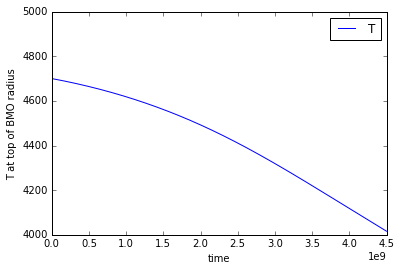

In [27]:
plt.plot(tim,T_top,label="T")
plt.ylim((4000,5000))
plt.xlabel('time')
plt.ylabel('T at top of BMO radius')
plt.legend()
plt.show()

NameError: name 'np' is not defined